## Regression Mini Project using Random Forest Classifier

I use car feature and MSRP dataset downloaded from kaggle. 

link : https://www.kaggle.com/CooperUnion/cardataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

It seems that our dataset needs preprocessing before we can fit it into our models.

### Data Cleaning

Firts, we search for missing values in dataset.

In [5]:
df['Engine HP'].isna().sum()

69

<b>Fillna for engine fuel type column.</b>
because the values is missing in Suzuki brands only, so we will fill it with mode(most values) for fuel type in Suzuki.

In [6]:
df[df['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [7]:
df[df['Make'] =='Suzuki']['Engine Fuel Type'].value_counts()

regular unleaded    348
Name: Engine Fuel Type, dtype: int64

In [8]:
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

For the ENGINE HP null columns I fill it with value obtained from grouping of Make and Vehicle Style mean.

In [9]:
df['Engine HP'].fillna(df.groupby(['Make', 'Vehicle Style'])['Engine HP'].transform('mean'),inplace=True)

there is still missing value on the Engine HP column, and I found that the Tesla models all have 0 for the Engine HP. So, I decided to input the average value of 375 which I found by googling. This is not the only way to deal with missing values, if it too risky to fill the missing data with values from uncertain source that might caused bias or error, better drop the columns.

In [10]:
df[df['Make'] == 'Tesla']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6921,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,79900
6922,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6923,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,94,86,1391,104500
6924,Tesla,Model S,2014,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,93400
6925,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900
6926,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,Performance",Large,Sedan,102,101,1391,75000
6927,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,106,95,1391,85000
6928,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,98,89,1391,105000
6929,Tesla,Model S,2015,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,90,88,1391,80000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500


In [11]:
df['Engine HP'].fillna(375, inplace=True)

<b>The same goes to Engine Cylinder columns. For Number of Doors, i just fill it with mode or majority values</b>

In [12]:
df['Number of Doors'].fillna(2, inplace=True)

In [13]:
df['Engine Cylinders'].fillna(round(df.groupby(['Make', 'Vehicle Style'])['Engine Cylinders'].transform('mean')),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

I drop the market category and popularity columns because the market value has too many missing value and variable. Popularity columns is not necessary because it show scores that does not related to car's peformance or specs.

In [15]:
df.drop(['Market Category', 'Popularity'], axis=1, inplace=True)

<b>I created new columns called Average MPG to contains mean from city and highway MPG</b>

In [16]:
df['Avg. MPG'] = (df['city mpg'] + df['highway MPG'])/2

I drop the city and highway MPG columns because the information about those columns is represented by Average MPG.

In [17]:
df.drop(['city mpg','highway MPG'], axis=1, inplace=True)

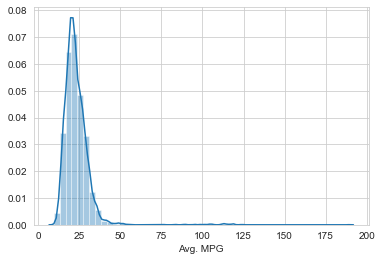

In [18]:
sns.distplot(df['Avg. MPG'])

Avg. MPG columns looks weird because there is a car that have over 175 MPG. 

In [19]:
df[df['Avg. MPG'] > 50]['Avg. MPG'].max()

189.0

There is a car that can run 189 miles on a gallon of fuel. It seems unrealistic, so I considered it as ountlier. We will remove the outlier by IQR methods. 

In [20]:
Q1 = df['Avg. MPG'].quantile(0.25)
Q3 = df['Avg. MPG'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [21]:
Q3

26.5

In [22]:
df['Avg. MPG'].describe()

count    11914.000000
mean        23.185370
std          8.669212
min          9.500000
25%         18.500000
50%         22.000000
75%         26.500000
max        189.000000
Name: Avg. MPG, dtype: float64

In [23]:
df_new = df[(df['Avg. MPG'] > lower) & (df['Avg. MPG'] < upper)]

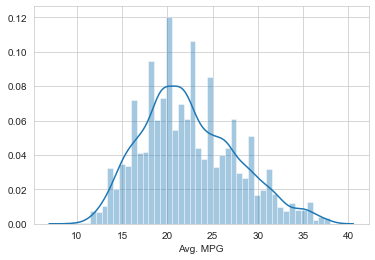

In [24]:
sns.distplot(df_new['Avg. MPG'])
plt.show()

<b>Now we continue to MSRP columns, there is cars that costs more than USD 100000,  I prefer to use the data with cars under USD 100000 to reduce data range.</b>

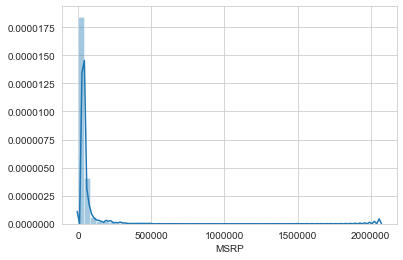

In [25]:
sns.distplot(df_new['MSRP'])

In [26]:
df_new = df_new[df_new['MSRP'] < 100000]

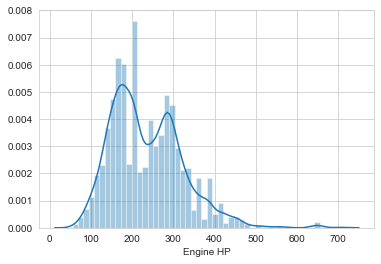

In [27]:
sns.distplot(df_new['Engine HP'])

### Data Export

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  MSRP               11914 non-null  int64  
 12  Avg. MPG           11914 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.2+ MB


In [29]:
df_new.to_csv('clean_data.csv', index=False)